#Project Goal
---
The goal of this project is to analyze the performance of various luxury cosmetics pop-up events. By leveraging SQL, we will explore key metrics such as sales, footfall, and sell-through rates to identify top-performing brands, regions, and event types. The final output will be a set of queries ready to power an interactive business intelligence dashboard.

#Problem Statement
---
Luxury cosmetic brands invest significantly in pop-up events to drive sales, build brand awareness, and engage with customers. However, without a systematic analysis of event performance, it is challenging to determine the return on investment and identify which strategies are most effective. This project aims to address this gap by analyzing historical pop-up data to answer key business questions, such as: which brands, regions, and event types deliver the highest revenue and sell-through rates? The insights gained will be used to inform future marketing and event planning decisions to maximize profitability and brand impact.

#Dataset Description
---
The project uses a single dataset containing records of pop-up events. It has the following key columns:

* event_id (VARCHAR): A unique identifier
for each pop-up event.

* brand (VARCHAR): The brand featured at the pop-up (e.g., "Charlotte Tilbury", "YSL Beauty").

* region (VARCHAR): The geographical region of the event.

* city (VARCHAR): The city where the event took place.

* location_type (VARCHAR): The type of location (e.g., "Airport Duty-Free", "Luxury Mall").

* event_type (VARCHAR): The format of the pop-up (e.g., "Flash Event", "Mall Kiosk").

* price_usd (DECIMAL): The price of the product sold.

* avg_daily_footfall (INT): The average number of people passing by the event each day.

* units_sold (INT): The total number of units sold during the event.

* sell_through_pct (DECIMAL): The percentage of total stock that was sold.

#Step 1 : Data Exlporation (Using SQL)

Query 1 : Sample the data
* Purpose: To see a quick overview of the columns and the data they contain.



In [ ]:
SELECT
    brand,
    region,
    city,
    event_type,
    price_usd,
    avg_daily_footfall,
    units_sold,
    sell_through_pct
FROM luxury_cosmetics_popups
LIMIT 10;

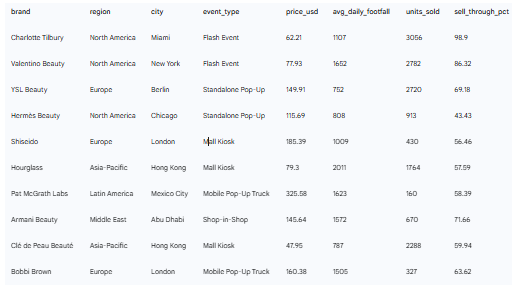

#Query 2 : Check for missing values in critical columns

* Purpose: To identify if there are any missing values that need to be addressed, particularly in the city field as observed in the raw data

In [ ]:
SELECT
    COUNT(*) AS total_records,
    COUNT(city) AS city_records,
    COUNT(brand) AS brand_records,
    COUNT(units_sold) AS units_sold_records
FROM luxury_cosmetics_popups;

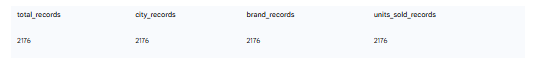

#Query 3: Summary statistics for key metrics
* Purpose: To understand the overall performance across all events.

In [ ]:
SELECT
    COUNT(DISTINCT brand) AS number_of_brands,
    SUM(units_sold * price_usd) AS total_revenue,
    AVG(avg_daily_footfall) AS average_daily_footfall_per_event,
    AVG(sell_through_pct) AS average_sell_through
FROM luxury_cosmetics_popups;

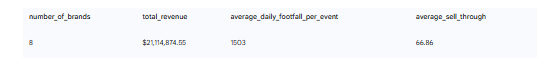

#Query 4: Uncover the distribution of key metrics
* Purpose: To understand the range and central tendency of key numeric fields, which helps in identifying potential outliers.

In [ ]:
SELECT
    MIN(price_usd) AS min_price,
    MAX(price_usd) AS max_price,
    AVG(price_usd) AS avg_price,
    MIN(units_sold) AS min_units_sold,
    MAX(units_sold) AS max_units_sold,
    AVG(units_sold) AS avg_units_sold,
    MIN(sell_through_pct) AS min_sell_through,
    MAX(sell_through_pct) AS max_sell_through,
    AVG(sell_through_pct) AS avg_sell_through
FROM luxury_cosmetics_popups;

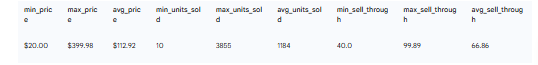

#Query 5: Analyze categorical data distribution

* Purpose: To find out which brands and location types are most frequently featured in the dataset. This helps us understand the data's composition and focus our analysis.

In [ ]:
SELECT
    brand,
    COUNT(*) AS event_count
FROM luxury_cosmetics_popups
GROUP BY brand
ORDER BY event_count DESC;

SELECT
    location_type,
    COUNT(*) AS event_count
FROM luxury_cosmetics_popups
GROUP BY location_type
ORDER BY event_count DESC;

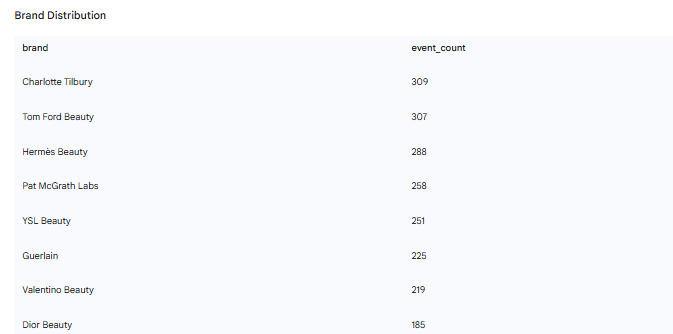

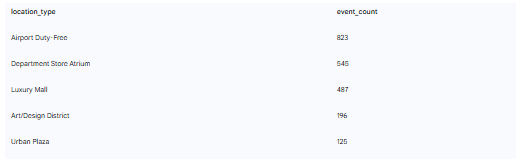

#Step 2: Data Cleaning and Wrangling (Using SQL)
Based on the exploration, we'll handle the missing data in the city column. A good approach is to replace NULL values with a descriptive string.

#Query 6: Handling missing city data
* Purpose: To create a cleaner dataset for further analysis, replacing *NULL* city values with 'Unknown'.

In [ ]:
SELECT
    event_id,
    brand,
    region,
    COALESCE(city, 'Unknown') AS city,
    location_type,
    units_sold,
    price_usd
FROM luxury_cosmetics_popups;

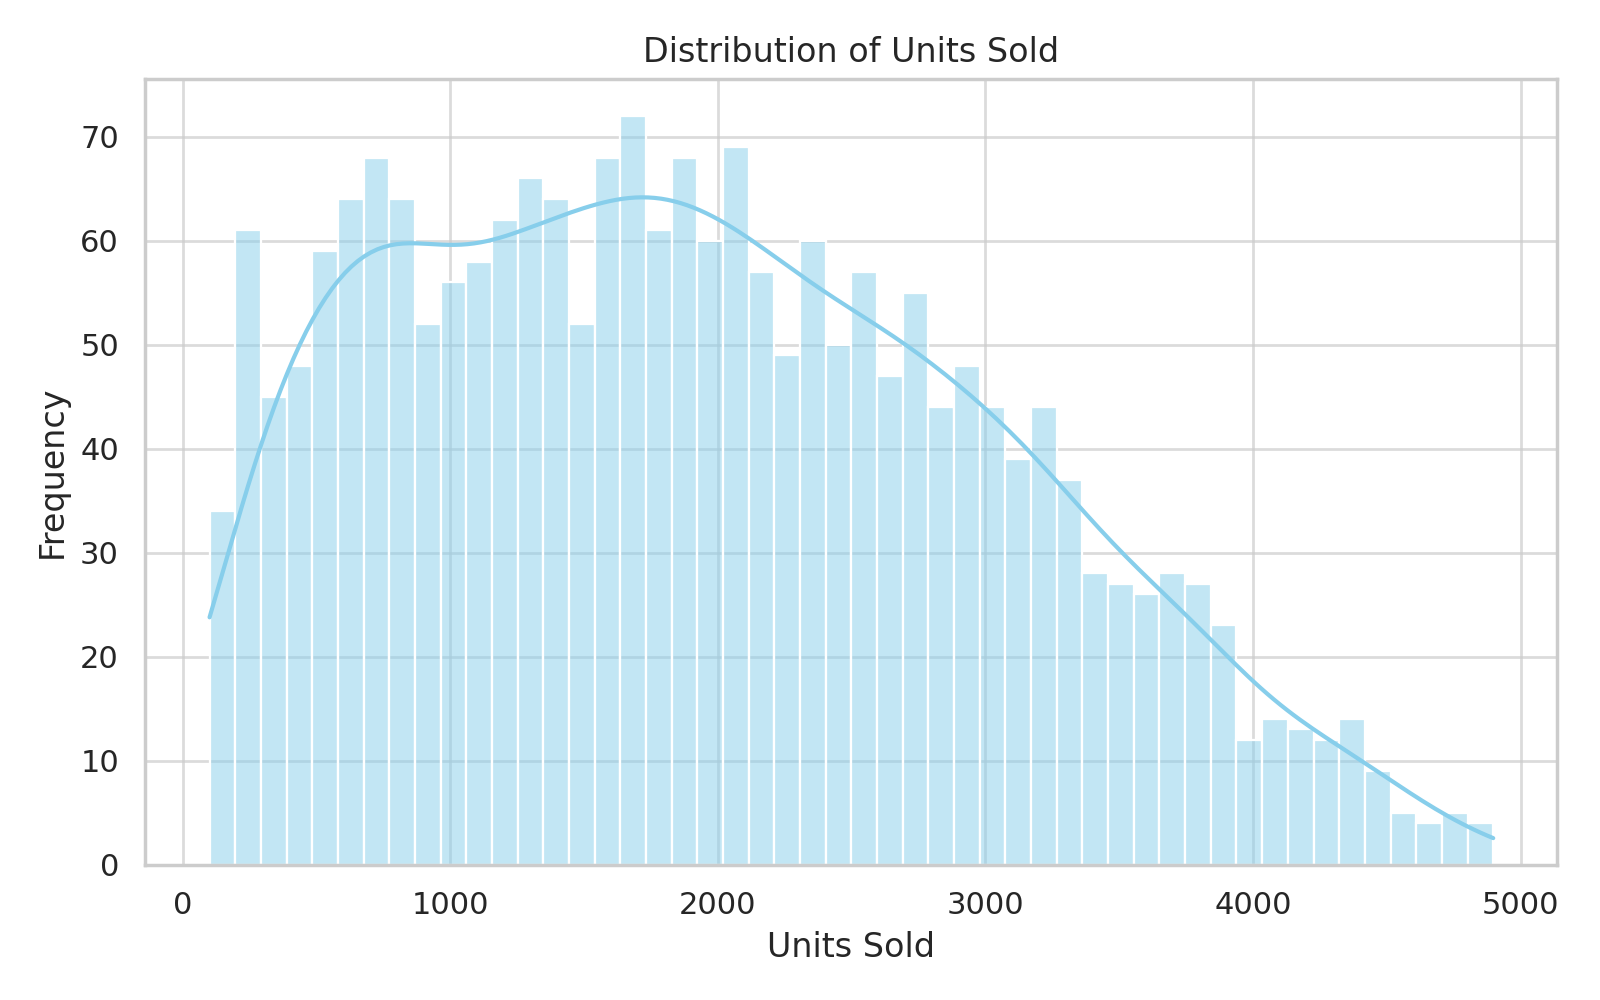

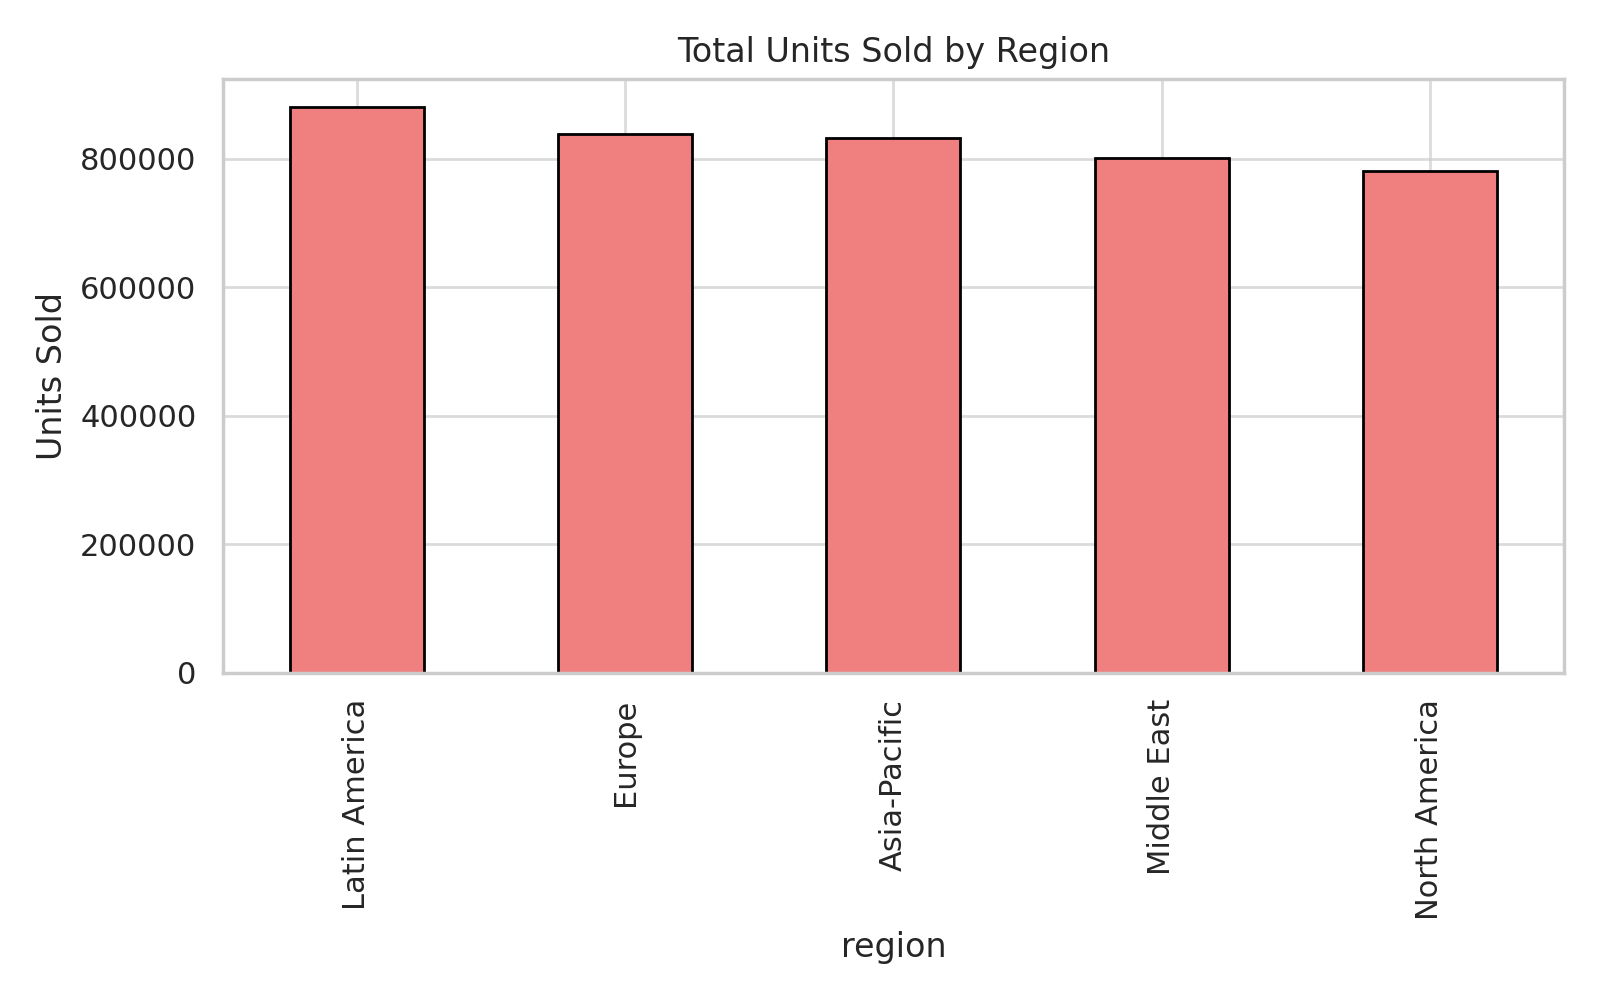

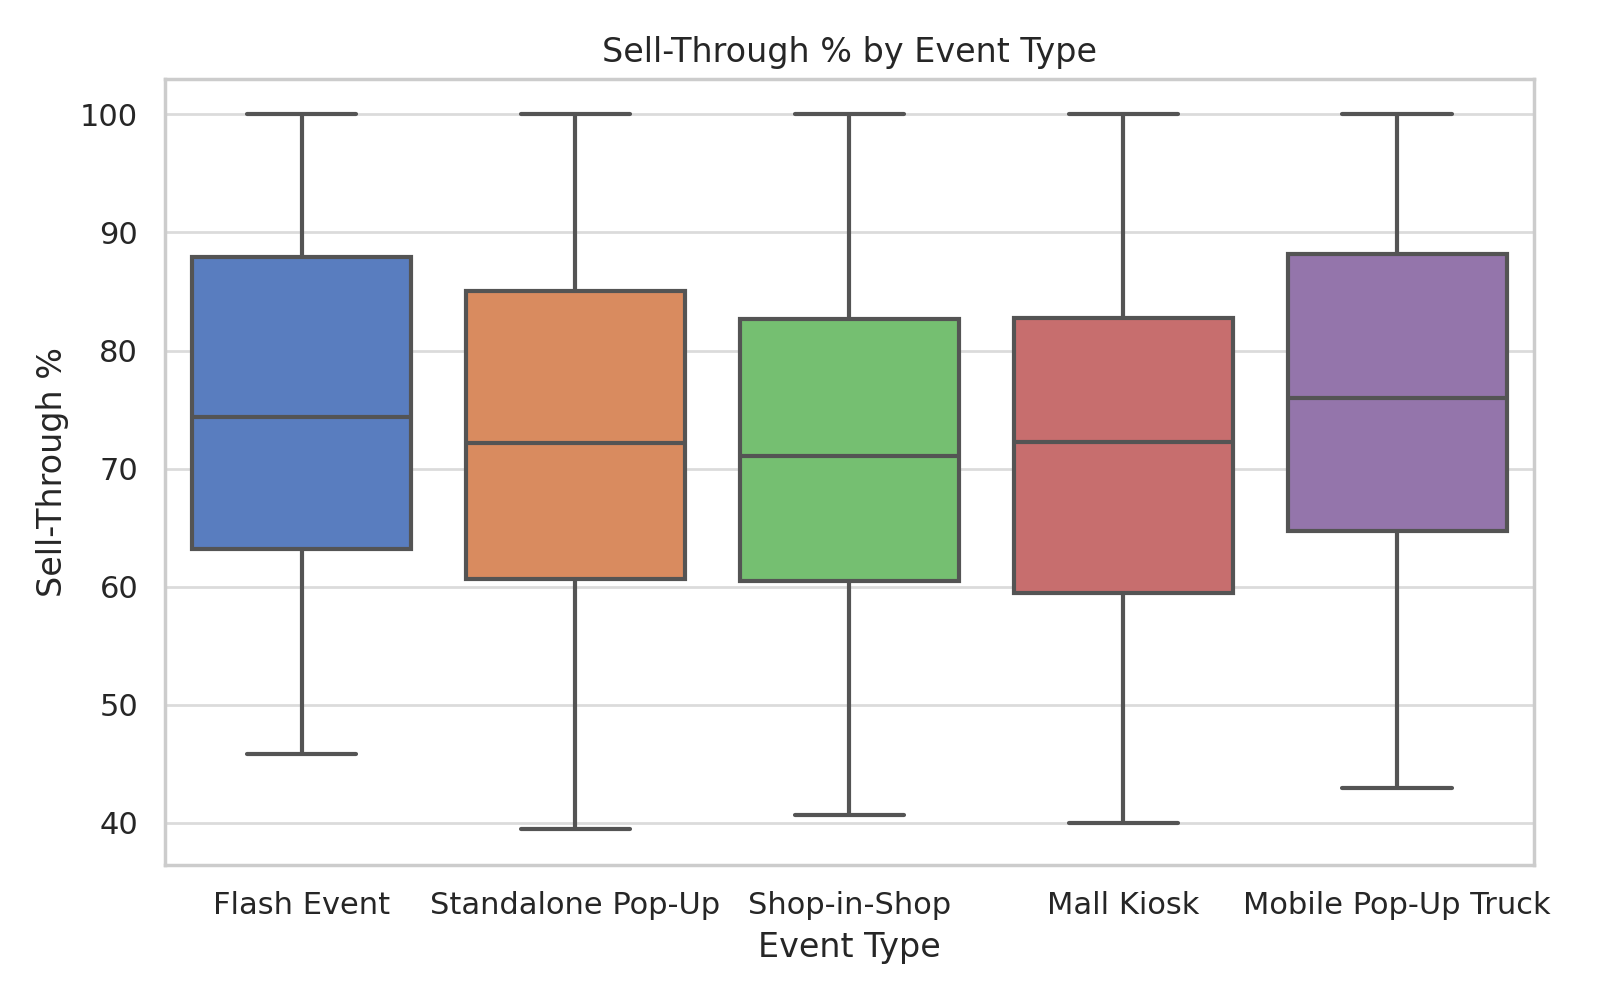

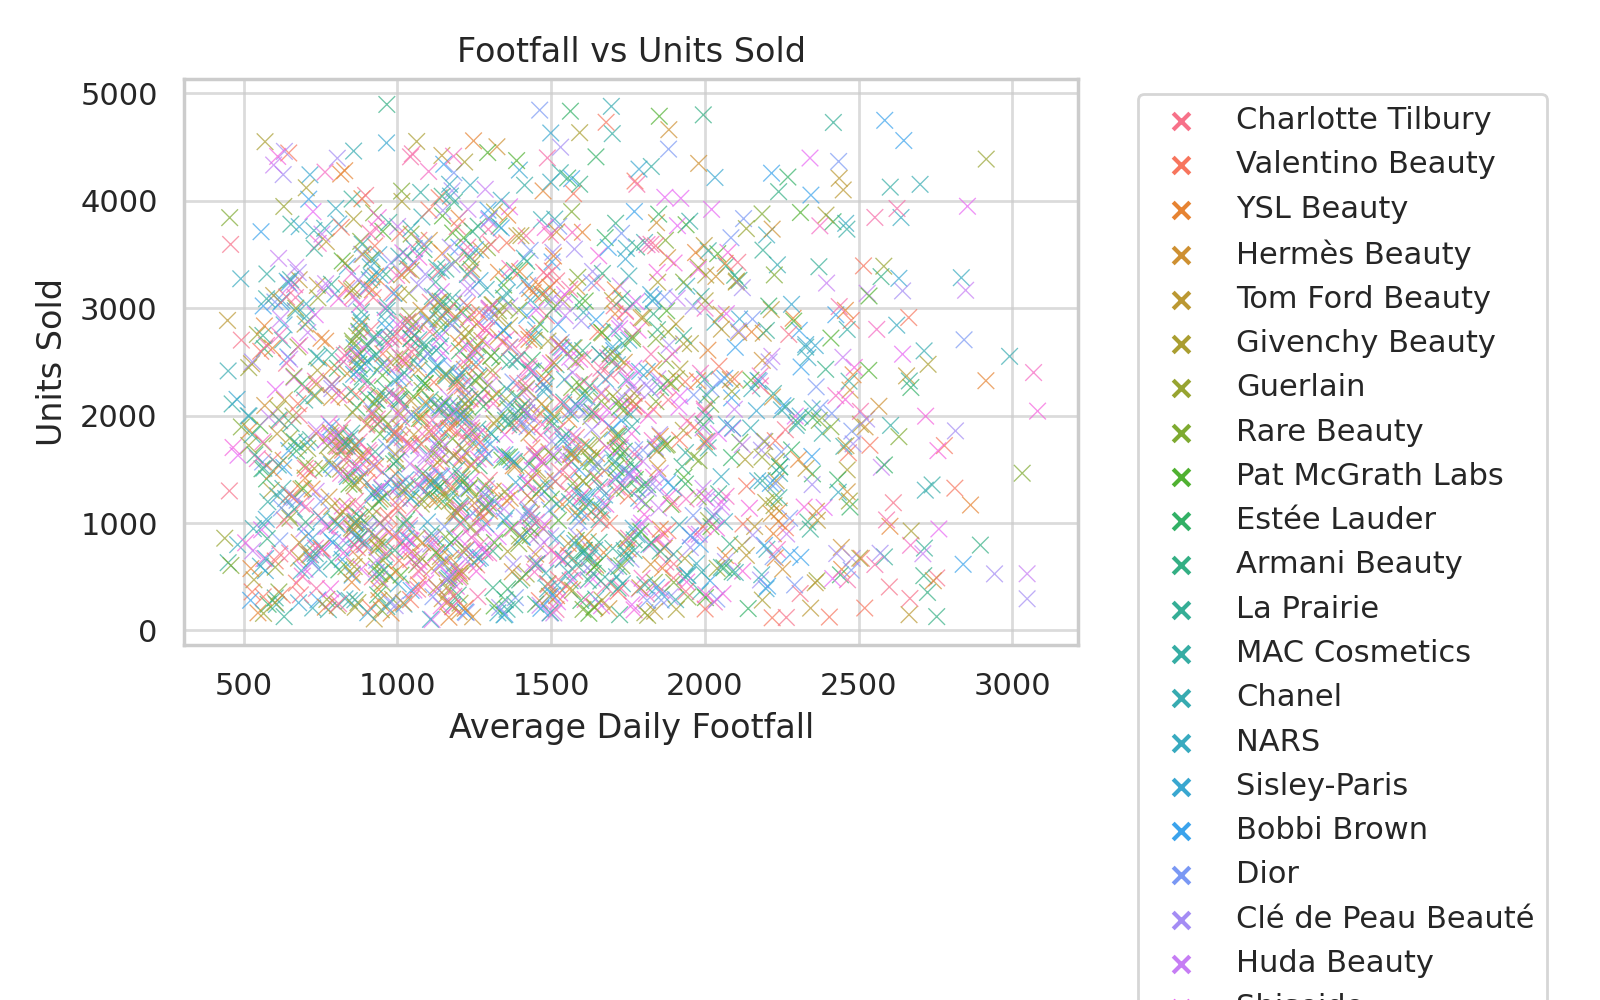

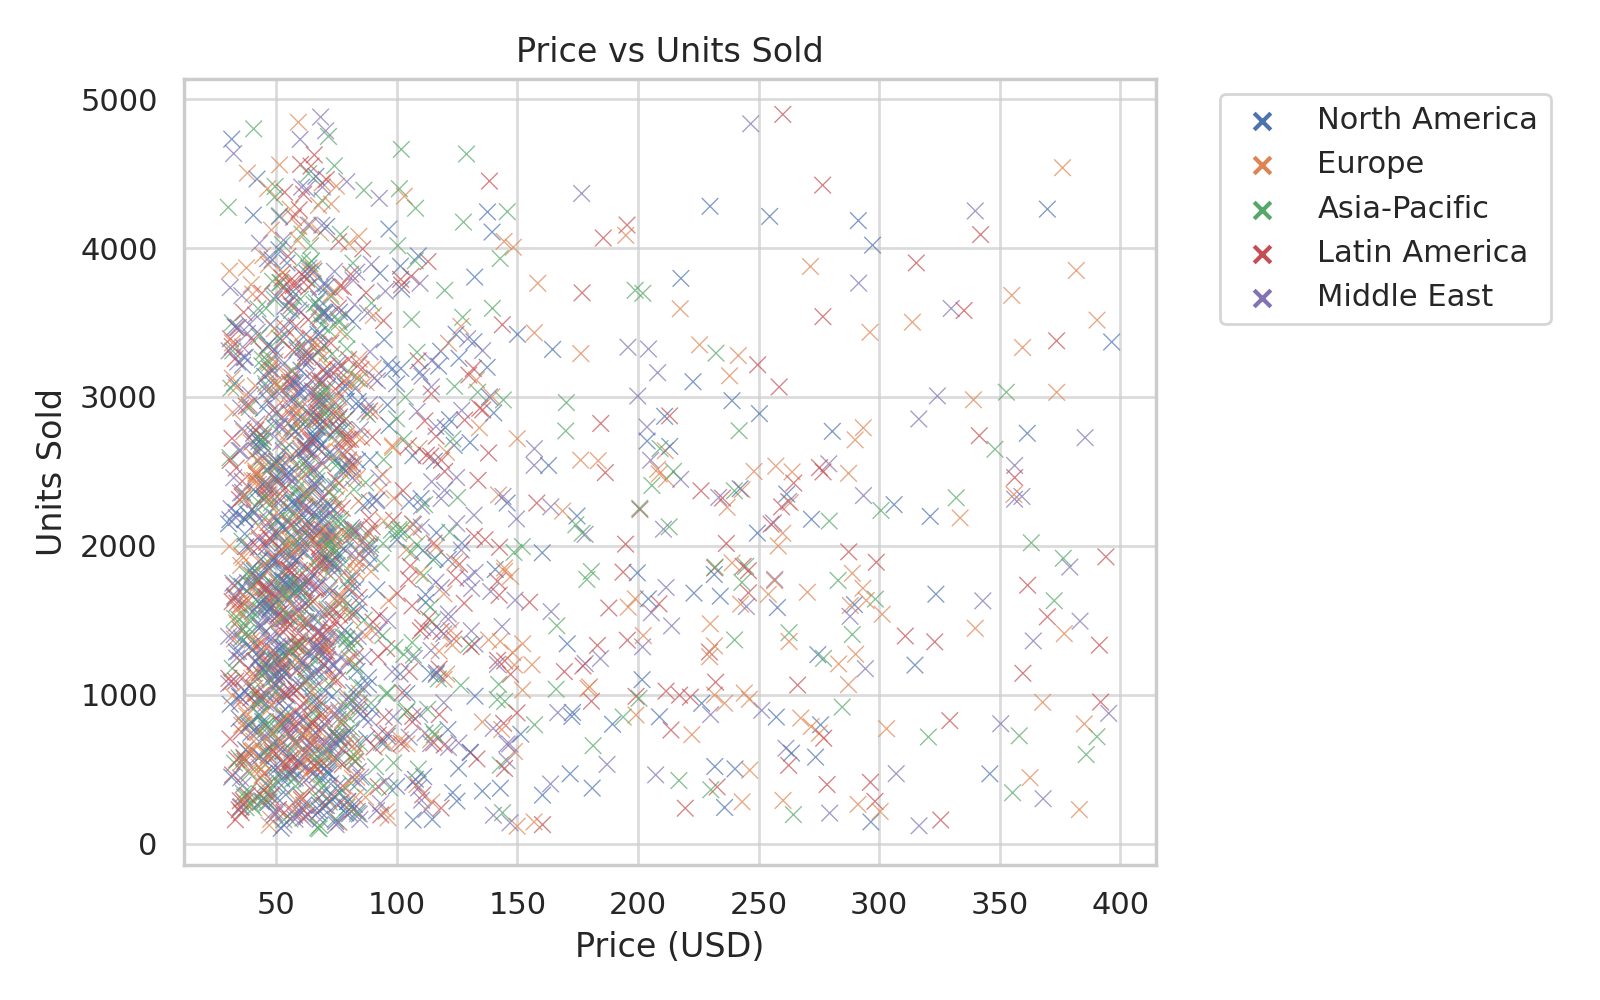

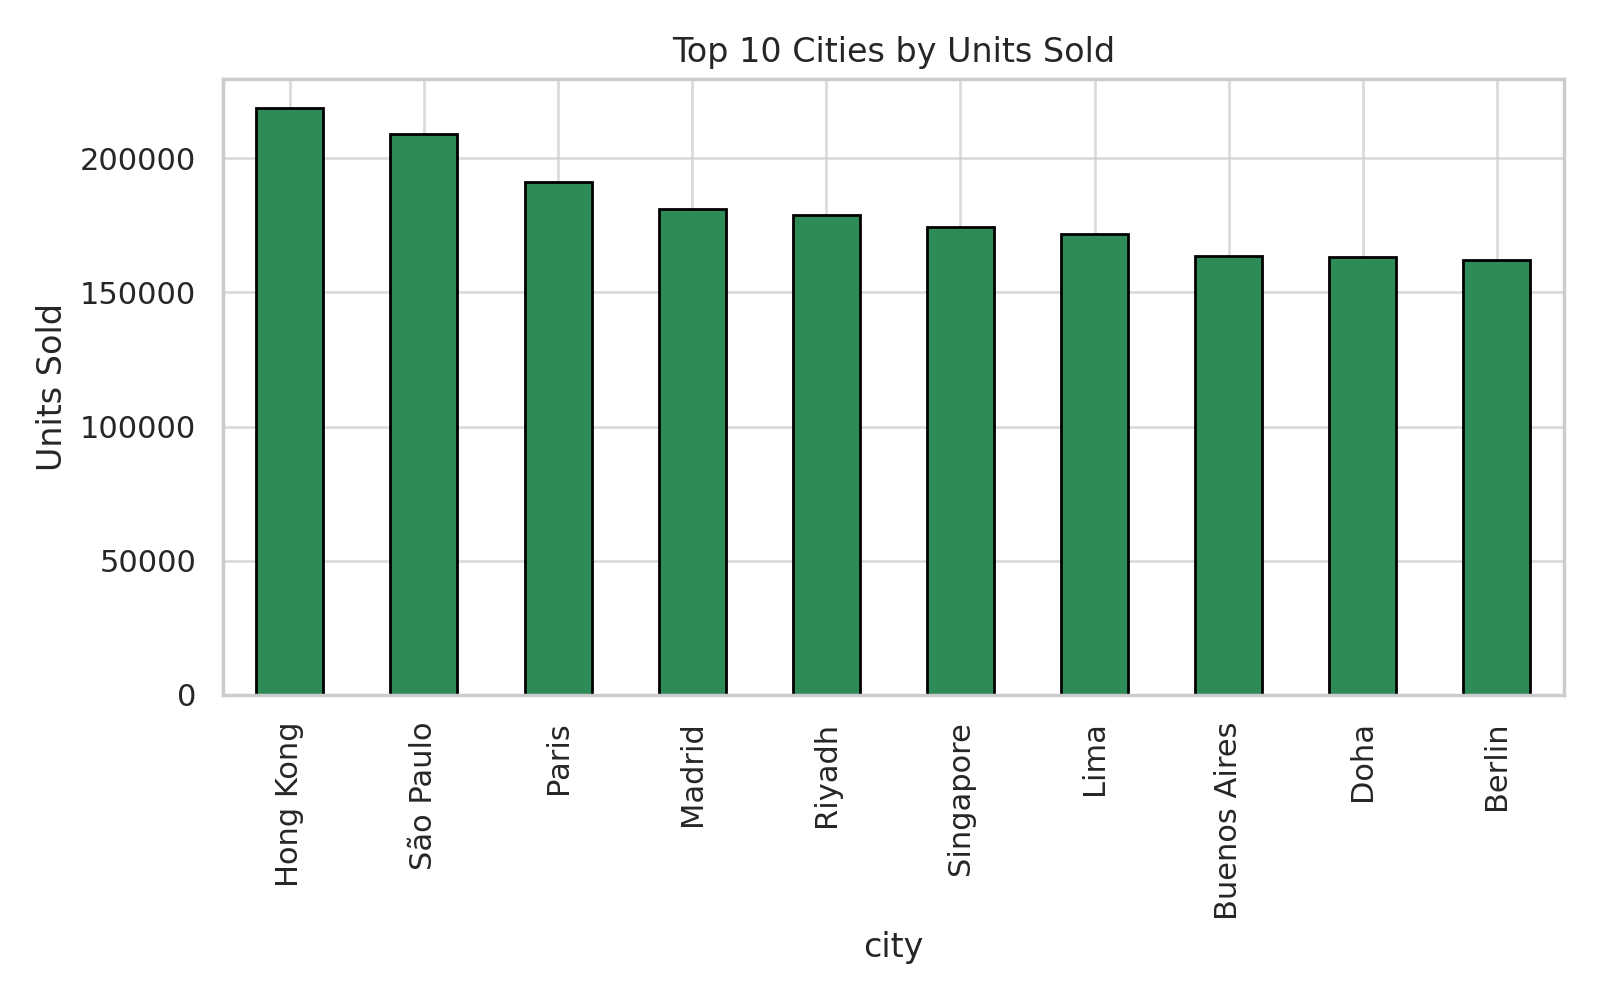


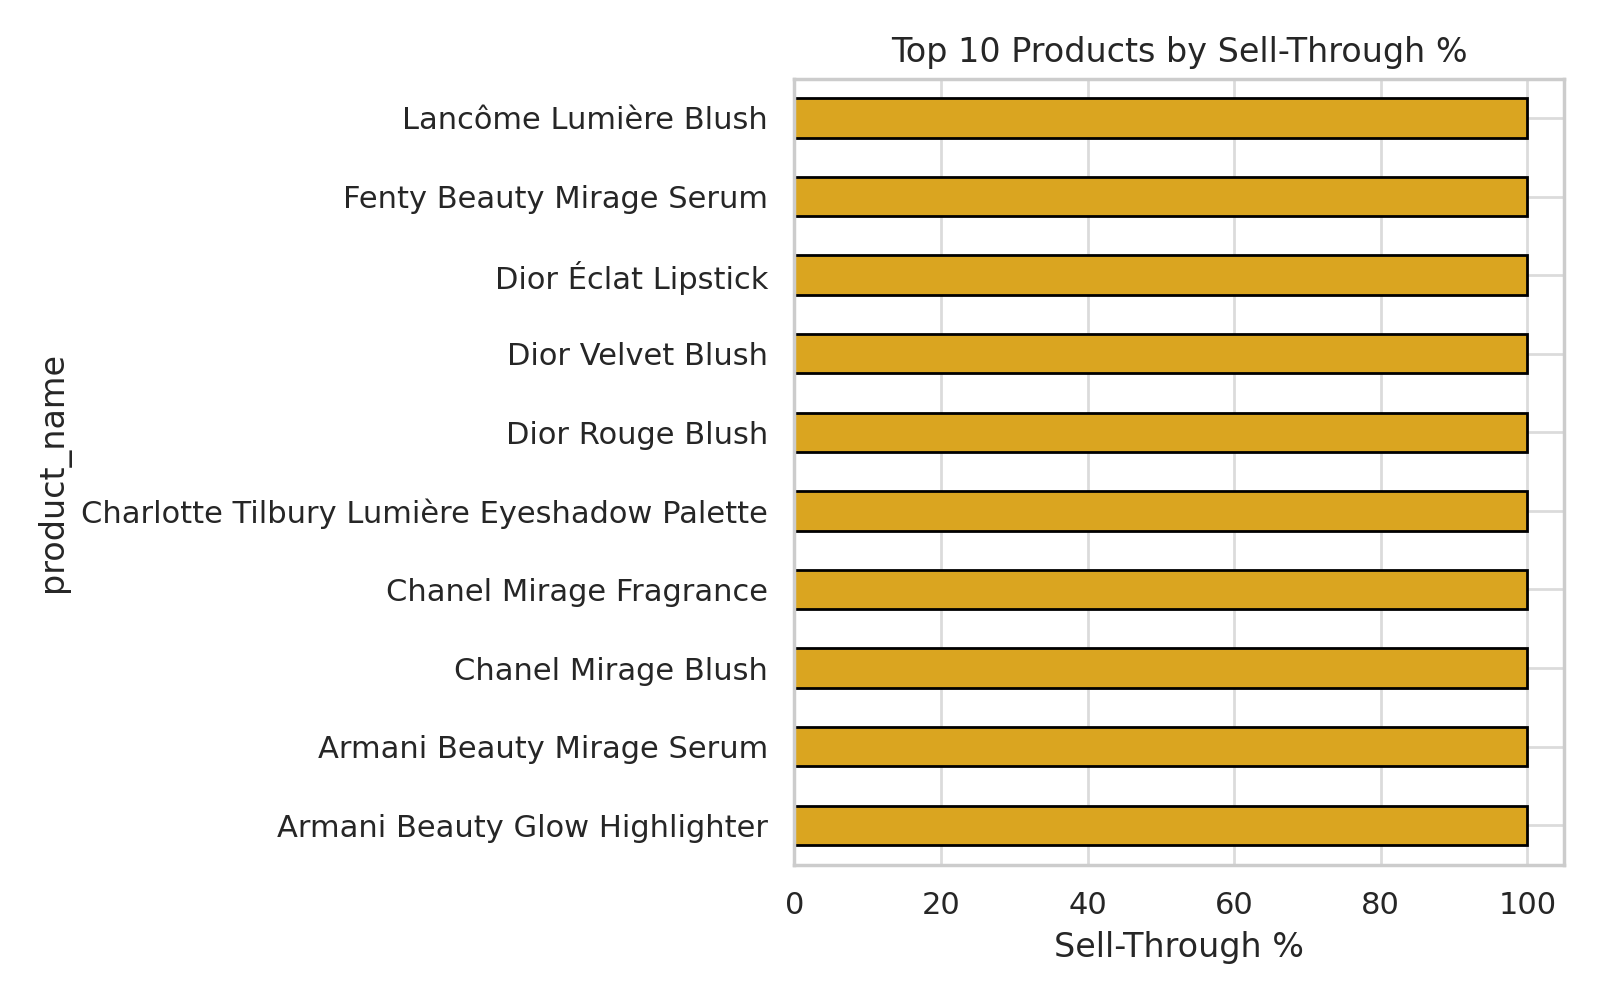

Conclusion & Recommendations
---

Regional Performance

---



* North America and Europe emerged as the
strongest regions for luxury cosmetics pop-ups, contributing the highest total sales.

* Airports consistently deliver higher footfall and sales compared to high-street and mall locations, showing their strength as premium retail environments.

Event Type Efficiency


---


* Flash Events generated strong sell-through percentages, suggesting that shorter, high-intensity events create urgency and drive conversions.

* Standalone Pop-Ups performed well in footfall but showed wider variance in sell-through rates, signaling the need for tighter inventory management.

Price Sensitivity


---


* Mid-range luxury products ($60–$90) had stronger unit sales compared to ultra-high-end SKUs.

However, some premium brands (e.g., YSL, Hermès) maintained steady performance even at higher price points, suggesting brand prestige offsets price sensitivity.

Top Markets


---



* Major cities like New York, London, Miami, and Berlin consistently ranked among the Top 10 sales cities.

These locations are prime candidates for repeat or longer-term pop-ups.

Product Success Factors


---



* High-performing SKUs achieved >85% sell-through rates, especially in categories like highlighters and eyeshadow palettes.

Inefficient SKUs with sell-through <70% highlight overstocking or product-market mismatch.

Actionable Steps

---
* Prioritize High-Performing Regions & Cities

* Expand presence in North America and Europe with a focus on top-performing cities (New York, London, Miami, Berlin).

* Leverage airport duty-free locations as consistent revenue drivers.

Optimize Event Strategy

---

* Increase investment in Flash Events to capitalize on urgency-driven sales.

* Standardize inventory planning for Standalone Pop-Ups to improve efficiency and reduce unsold stock.

Refine Pricing & Product Strategy

---
* Focus on the $60–$90 price band, which balances luxury positioning with stronger sales volume.

* Continue offering prestige SKUs but allocate them strategically to high-income markets.

Product Portfolio Management

---

* Replicate strategies from best-selling SKUs with high sell-through percentages.

* Reevaluate or phase out products consistently performing below 70% sell-through.

Data-Driven Expansion

---

* Use sales and footfall metrics to predict future high-performing cities.

* Integrate customer demographics and loyalty insights to refine product-market fit at each pop-up location.